# Summary

Summing up, let's go over the results once more.

## Data import

We'll import the original data, although we're mostly interested in the y-test there.

In [2]:
import pickle

# Load the pickle file
with open('exports/non_linear_data.pkl', 'rb') as file:
    data_dict = pickle.load(file)

# Display the loaded data

X_train = data_dict["X_train"]
X_test = data_dict["X_test"]
y_train = data_dict["y_train"]
y_test = data_dict["y_test"]

We'll also import the results of the different models.

In [4]:
import os
import pickle

# List all files in the "exports" directory that start with "y_pred"
y_pred_files = [f for f in os.listdir('exports') if f.startswith('y_pred')]

y_pred_data = {}
for file_name in y_pred_files:
    with open(f'exports/{file_name}', 'rb') as file:
        y_pred_data[file_name[7:-4]] = pickle.load(file)

print(*y_pred_data.keys(), sep="\n")

gradientbooster
linear
randomforest
stacking
tree
xgboost


## Comparing results

We'll start by comparing the RMSE's of the different models.

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_list = []

for key, y_pred in y_pred_data.items():
    rmse_list.append([key, np.sqrt(mean_squared_error(y_test, y_pred))])
    
rmse_list.sort(key=lambda x: x[1])
print("RMSE for each model:")
for model, rmse in rmse_list:
    print(f"\t{model}: {rmse:.4f}")

RMSE for each model:
	stacking: 2.0728
	xgboost: 2.0819
	randomforest: 2.0839
	gradientbooster: 2.1200
	tree: 2.2617
	linear: 3.0837


And the graphs...

ValueError: num must be an integer with 1 <= num <= 2, not 3

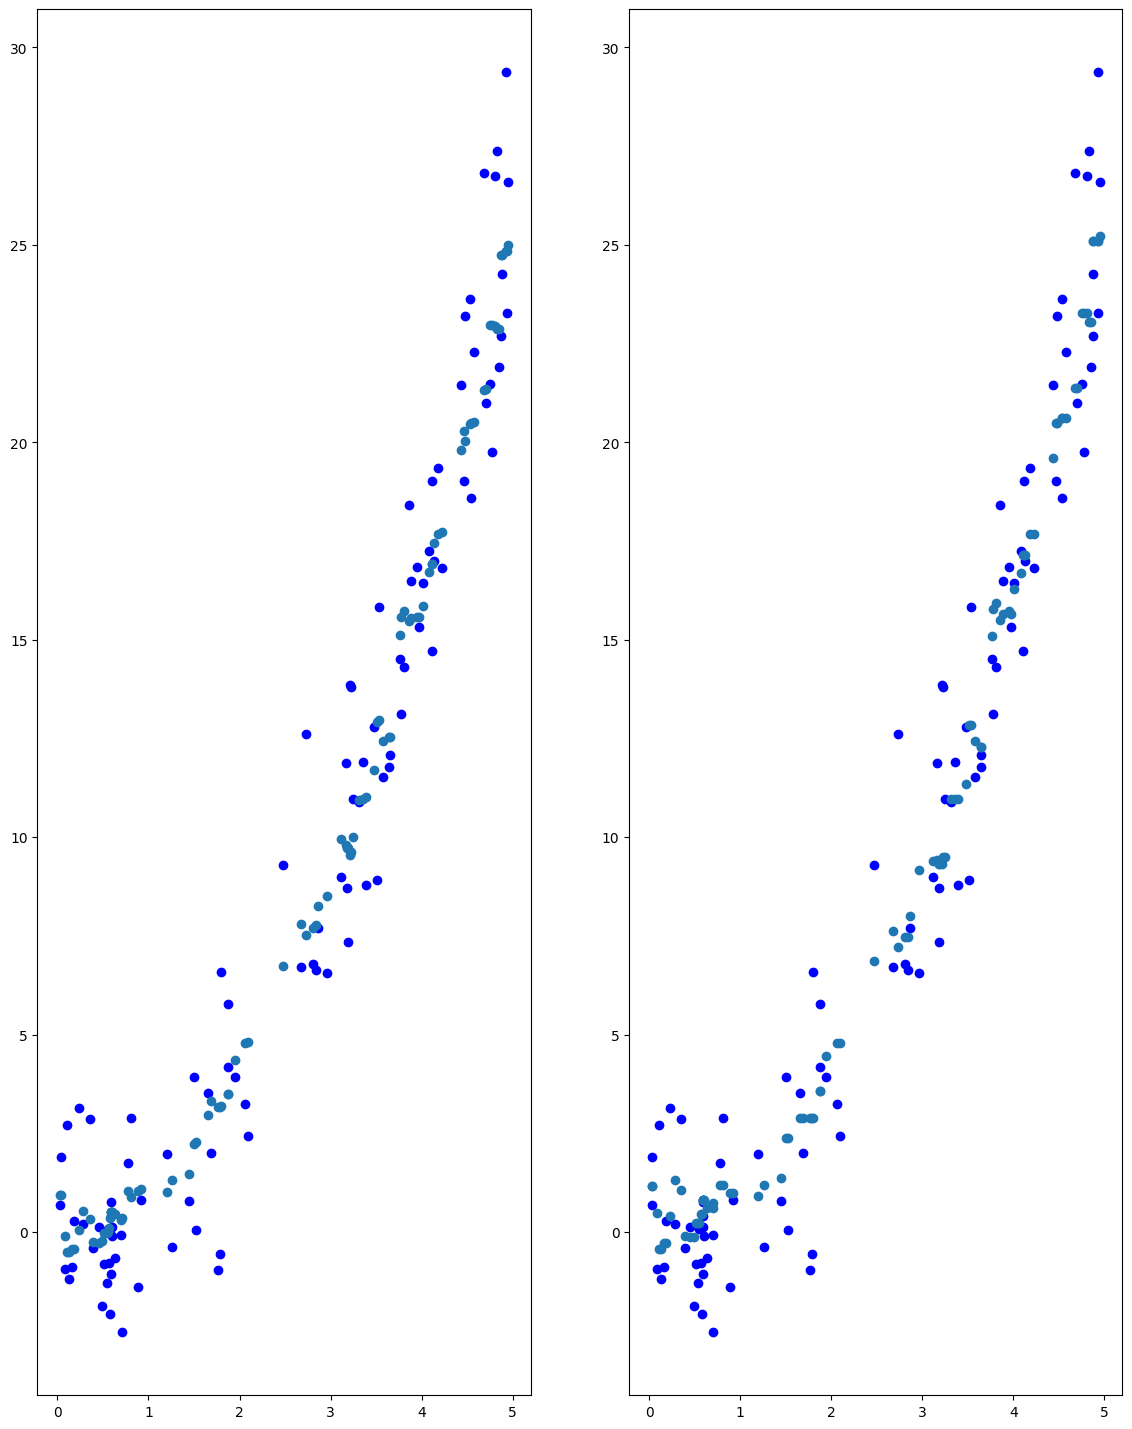

In [17]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(14, 6*3))

for key, value in enumerate(rmse_list):
    model_name = value[0]
    y_pred = y_pred_data[model_name]
    
    # print(key//2+1, key%2+1)
    
    # plt.subplot(key//2+1, key%2+1, 1)
    plt.subplot(1, 2, key+1)
    plt.scatter(X_test, y_test, color='blue', label='Actual Data')
    plt.scatter(X_test, y_pred, label=f'Predicted Data ({model_name})')

# # Plot Linear Regression results
# plt.subplot(1, 2, 1)
# plt.scatter(X_test, y_test, color='blue', label='Actual Data')
# plt.scatter(X_test, y_pred_linear, color='red', label='Predicted Data (Linear Regression)')
# plt.title('Linear Regression')
# plt.xlabel('Feature')
# plt.ylabel('Target')
# plt.legend()

# # Plot Decision Tree Regression results
# plt.subplot(1, 2, 2)
# plt.scatter(X_test, y_test, color='blue', label='Actual Data')
# plt.scatter(X_test, y_pred_tree, color='green', label='Predicted Data (Decision Tree)')
# plt.title('Decision Tree Regression')
# plt.xlabel('Feature')
# plt.ylabel('Target')
# plt.legend()

# plt.tight_layout()
plt.show()